In [12]:
from scipy import misc
from PIL import Image
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.filters import threshold_otsu
from skimage.morphology import square
from skimage.morphology import closing

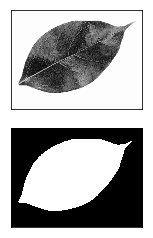

In [13]:
I = asarray(Image.open('15.jpg'));
Ig = np.dot(I[...,:3], [0.299, 0.587, 0.114])
thresh = threshold_otsu(Ig)
Ib = Ig > thresh
Ib = 1-Ib
Ib = closing(Ib, square(15))
ax = plt.subplot(2, 1, 1)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.imshow(Ig, cmap=plt.cm.gray)

ax = plt.subplot(2, 1, 2)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.imshow(Ib, cmap=plt.cm.gray)

plt.show()

In [14]:
gi = 0
gj = 0
iflag = 0
for i in range(1, Ib.shape[0]-1):
    for j in range(1, Ib.shape[1]-1):
        if(Ib[i,j]==1):
            gi = i
            gj = j
            iflag = 1
        if(iflag == 1):
            break
    if(iflag == 1):
        break

In [15]:
Im = np.zeros(Ib.shape);
      
starti = gi
startj = gj
gc = 0 
k = gi-1
l = gj-1
while(gc < Ib.shape[0]*Ib.shape[1]):
    flag = 0
    k = gi-1
    l = gj-1
    
    if(flag == 0):
        while(k <= gi+1):
            if(Ib[k,l]==1):
                flag=1
                break
            k+=1
    if(flag == 0):
        while(l <= gj+1):
            if(Ib[k,l]==1):
                flag=1
                break
            l+=1
    if(flag == 0):
        while(k >= gi-1):
            if(Ib[k,l]==1):
                flag=1
                break
            k-=1
    if(flag == 0):
        while(l >= gj-1):
            if(Ib[k,l]==1):
                flag=1
                break
            l-=1
            
    if(flag == 1):
        gi=k
        gj=l
        Im[k,l] = 1
    gc+=1

gc=0
while(gc < Ib.shape[0]*Ib.shape[1]):
    flag = 0
    k = gi+1
    l = gj+1
    
    if(flag == 0):
        while(k >= gi-1):
            if(Ib[k,l]==1):
                flag=1
                break
            k-=1
    if(flag == 0):
        while(l >= gj-1):
            if(Ib[k,l]==1):
                flag=1
                break
            l-=1
    if(flag == 0):
        while(k <= gi+1):
            if(Ib[k,l]==1):
                flag=1
                break
            k+=1
    if(flag == 0):
        while(l <= gj+1):
            if(Ib[k,l]==1):
                flag=1
                break
            l+=1
    if(flag == 1):
        gi=k
        gj=l
        Im[k,l] = 1
    gc+=1

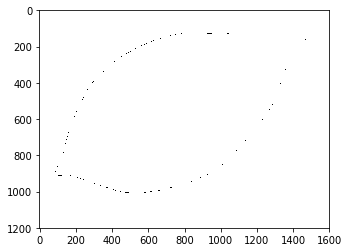

In [16]:
plt.imshow(Im, cmap=plt.cm.binary)
plt.show()

In [21]:
Im = Image.fromarray((Im * 255).astype(uint8))
Im.save('contour.png')